In [1]:
#! ipython suppress id=91bf744c97594b79aeaf6a9c84176193
%pushd book-materials
import numpy as np
import pandas as pd
PREVIOUS_MAX_ROWS = pd.options.display.max_rows
pd.options.display.max_columns = 20
pd.options.display.max_rows = 20
pd.options.display.max_colwidth = 80
np.random.seed(12345)
import matplotlib.pyplot as plt
plt.rc("figure", figsize=(10, 6))
np.set_printoptions(precision=4, suppress=True)

[Errno 2] No such file or directory: 'book-materials'
/Users/yuanli/Python Projects/pydata-book-3rd-edition


In [2]:
import numpy as np
import pandas as pd

# GroupBy Mechanics

In [3]:
df = pd.DataFrame({"key1" : ["a", "a", None, "b", "b", "a", None],
                   "key2" : pd.Series([1, 2, 1, 2, 1, None, 1], dtype="Int64"),
                   "data1" : np.random.standard_normal(7),
                   "data2" : np.random.standard_normal(7)})
df

,key1,key2,data1,data2
0,a,1,-0.204708,0.281746
1,a,2,0.478943,0.769023
2,None,1,-0.519439,1.246435
3,b,2,-0.555730,1.007189
4,b,1,1.965781,-1.296221
5,a,<NA>,1.393406,0.274992
6,None,1,0.092908,0.228913


In [4]:
grouped = df["data1"].groupby(df["key1"])
grouped

In [5]:
grouped.mean()

key1
a    0.555881
b    0.705025
Name: data1, dtype: float64

In [6]:
means = df["data1"].groupby([df["key1"], df["key2"]]).mean()
means

key1  key2
a     1      -0.204708
      2       0.478943
b     1       1.965781
      2      -0.555730
Name: data1, dtype: float64

In [7]:
means.unstack()

key2,1,2
key1,,
a,-0.204708,0.478943
b,1.965781,-0.555730


In [8]:
df

,key1,key2,data1,data2
0,a,1,-0.204708,0.281746
1,a,2,0.478943,0.769023
2,None,1,-0.519439,1.246435
3,b,2,-0.555730,1.007189
4,b,1,1.965781,-1.296221
5,a,<NA>,1.393406,0.274992
6,None,1,0.092908,0.228913


In [9]:
#group the data in the "data1" column by the combination of state and year. position matches
states = np.array(["OH", "CA", "CA", "OH", "OH", "CA", "OH"])
years =           [2005, 2005, 2006, 2005, 2006, 2005, 2006]
df["data1"].groupby([states, years]).mean()

CA  2005    0.936175
    2006   -0.519439
OH  2005   -0.380219
    2006    1.029344
Name: data1, dtype: float64

In [10]:
#work out how CA 2005 has a mean of 0.936175
(df.loc[1, "data1"] + df.loc[5, "data1"] )/2

0.9361745855152693

In [11]:
df.groupby("key1").mean()

,key2,data1,data2
key1,,,
a,1.5,0.555881,0.441920
b,1.5,0.705025,-0.144516


In [12]:
df.groupby("key2").mean()

,data1,data2
key2,,
1,0.333636,0.115218
2,-0.038393,0.888106


In [13]:
df.groupby(["key1", "key2"]).mean()

data1     data2
key1 key2                    
a    1    -0.204708  0.281746
     2     0.478943  0.769023
b    1     1.965781 -1.296221
     2    -0.555730  1.007189

In [14]:
df.groupby(["key1", "key2"]).size()

key1  key2
a     1       1
      2       1
b     1       1
      2       1
dtype: int64

In [15]:
#By default, the groupby() method in Pandas excludes NaNs in the grouped column
df.groupby("key1", dropna=False).size()
df.groupby(["key1", "key2"], dropna=False).size()

key1  key2
a     1       1
      2       1
      NaN     1
b     1       1
      2       1
NaN   1       2
dtype: int64

In [16]:
df.groupby("key1").count()

,key2,data1,data2
key1,,,
a,2,3,3
b,2,2,2


# Iterating Over Groups

In [17]:
df

,key1,key2,data1,data2
0,a,1,-0.204708,0.281746
1,a,2,0.478943,0.769023
2,None,1,-0.519439,1.246435
3,b,2,-0.555730,1.007189
4,b,1,1.965781,-1.296221
5,a,<NA>,1.393406,0.274992
6,None,1,0.092908,0.228913


In [18]:
#print group name ONLY
for name, group in df.groupby("key1"):
    print(name)
#     print(group)

a
b


In [19]:
#print group name an grouped results without aggregation. NaNs in grouped column are dropped by default
for name, group in df.groupby("key1"):
    print(name)
    print(group)

a
  key1  key2     data1     data2
0    a     1 -0.204708  0.281746
1    a     2  0.478943  0.769023
5    a  <NA>  1.393406  0.274992
b
  key1  key2     data1     data2
3    b     2 -0.555730  1.007189
4    b     1  1.965781 -1.296221


In [20]:
#print group name an grouped results without aggregation. NaNs in grouped column are dropped by default
for (k1, k2), group in df.groupby(["key1", "key2"]):
    print((k1, k2))
    print(group)

('a', 1)
  key1  key2     data1     data2
0    a     1 -0.204708  0.281746
('a', 2)
  key1  key2     data1     data2
1    a     2  0.478943  0.769023
('b', 1)
  key1  key2     data1     data2
4    b     1  1.965781 -1.296221
('b', 2)
  key1  key2    data1     data2
3    b     2 -0.55573  1.007189


In [21]:
#dropna=False
for (k1,k2), group in df.groupby(['key1','key2'], dropna=False):
    print((k1,k2))
    print(group)

('a', 1)
  key1  key2     data1     data2
0    a     1 -0.204708  0.281746
('a', 2)
  key1  key2     data1     data2
1    a     2  0.478943  0.769023
('a', <NA>)
  key1  key2     data1     data2
5    a  <NA>  1.393406  0.274992
('b', 1)
  key1  key2     data1     data2
4    b     1  1.965781 -1.296221
('b', 2)
  key1  key2    data1     data2
3    b     2 -0.55573  1.007189
(nan, 1)
   key1  key2     data1     data2
2  None     1 -0.519439  1.246435
6  None     1  0.092908  0.228913


In [22]:
pieces = {name: group for name, group in df.groupby("key1")}
pieces

{'a':   key1  key2     data1     data2
 0    a     1 -0.204708  0.281746
 1    a     2  0.478943  0.769023
 5    a  <NA>  1.393406  0.274992,
 'b':   key1  key2     data1     data2
 3    b     2 -0.555730  1.007189
 4    b     1  1.965781 -1.296221}

In [23]:
pieces["b"]

,key1,key2,data1,data2
3,b,2,-0.555730,1.007189
4,b,1,1.965781,-1.296221


In [24]:
grouped = df.groupby({"key1": "key", "key2": "key",
                      "data1": "data", "data2": "data"}, 
                     axis="columns")
grouped

In [25]:
for group_key, group_values in grouped:
    print(group_key)
    print(group_values)

data
      data1     data2
0 -0.204708  0.281746
1  0.478943  0.769023
2 -0.519439  1.246435
3 -0.555730  1.007189
4  1.965781 -1.296221
5  1.393406  0.274992
6  0.092908  0.228913
key
   key1  key2
0     a     1
1     a     2
2  None     1
3     b     2
4     b     1
5     a  <NA>
6  None     1


# Selecting a Column or Subset of Columns

In [26]:
df

,key1,key2,data1,data2
0,a,1,-0.204708,0.281746
1,a,2,0.478943,0.769023
2,None,1,-0.519439,1.246435
3,b,2,-0.555730,1.007189
4,b,1,1.965781,-1.296221
5,a,<NA>,1.393406,0.274992
6,None,1,0.092908,0.228913


In [27]:
#[['data2']] results in a new DataFrame, ['data2'] returns a new Series
df.groupby(["key1", "key2"])[["data2"]].mean()

data2
key1 key2          
a    1     0.281746
     2     0.769023
b    1    -1.296221
     2     1.007189

In [28]:
#[['data2']] results in a new DataFrame, ['data2'] returns a new Series
df.groupby(["key1", "key2"])["data2"].mean()

key1  key2
a     1       0.281746
      2       0.769023
b     1      -1.296221
      2       1.007189
Name: data2, dtype: float64

In [29]:
s_grouped = df.groupby(["key1", "key2"])["data2"].mean()
s_grouped

key1  key2
a     1       0.281746
      2       0.769023
b     1      -1.296221
      2       1.007189
Name: data2, dtype: float64

# Grouping with Dicts and Series

In [30]:
people = pd.DataFrame(np.random.randn(5, 5),
                      columns=["a", "b", "c", "d", "e"],
                      index=["Joe", "Steve", "Wanda", "Jill", "Trey"])
people.iloc[2:3, [1, 2]] = np.nan # Add a few NA values
people

,a,b,c,d,e
Joe,1.352917,0.886429,-2.001637,-0.371843,1.669025
Steve,-0.438570,-0.539741,0.476985,3.248944,-1.021228
Wanda,-0.577087,NaN,NaN,0.523772,0.000940
Jill,1.343810,-0.713544,-0.831154,-2.370232,-1.860761
Trey,-0.860757,0.560145,-1.265934,0.119827,-1.063512


In [31]:
people.iloc[2:3,1:3]

,b,c
Wanda,NaN,NaN


Grouping with Dicts

In [32]:
mapping = {"a": "red", "b": "red", "c": "blue",
           "d": "blue", "e": "red", "f" : "orange"}
mapping

{'a': 'red', 'b': 'red', 'c': 'blue', 'd': 'blue', 'e': 'red', 'f': 'orange'}

In [33]:
by_column = people.groupby(mapping, axis="columns")
by_column.sum()

,blue,red
Joe,-2.373480,3.908371
Steve,3.725929,-1.999539
Wanda,0.523772,-0.576147
Jill,-3.201385,-1.230495
Trey,-1.146107,-1.364125


Grouping with Series

In [34]:
map_series = pd.Series(mapping)
map_series

a       red
b       red
c      blue
d      blue
e       red
f    orange
dtype: object

In [35]:
people.groupby(map_series, axis="columns").count()

,blue,red
Joe,2,3
Steve,2,3
Wanda,1,2
Jill,2,3
Trey,2,3


# Grouping with Functions

In [36]:
people

,a,b,c,d,e
Joe,1.352917,0.886429,-2.001637,-0.371843,1.669025
Steve,-0.438570,-0.539741,0.476985,3.248944,-1.021228
Wanda,-0.577087,NaN,NaN,0.523772,0.000940
Jill,1.343810,-0.713544,-0.831154,-2.370232,-1.860761
Trey,-0.860757,0.560145,-1.265934,0.119827,-1.063512


In [37]:
# Any function passed as a group key will be called once per index value, with the return values being used as the 
# group names
people.groupby(len).sum()

,a,b,c,d,e
3,1.352917,0.886429,-2.001637,-0.371843,1.669025
4,0.483052,-0.153399,-2.097088,-2.250405,-2.924273
5,-1.015657,-0.539741,0.476985,3.772716,-1.020287


In [38]:
# Mixing functions with arrays, dicts, or Series is not a problem as everything gets con- verted to arrays internally
key_list = ["one", "one", "one", "two", "two"]
people.groupby([len, key_list]).min()

,,a,b,c,d,e
3,one,1.352917,0.886429,-2.001637,-0.371843,1.669025
4,two,-0.860757,-0.713544,-1.265934,-2.370232,-1.860761
5,one,-0.577087,-0.539741,0.476985,0.523772,-1.021228


# Grouping by Index Levels

In [39]:
columns = pd.MultiIndex.from_arrays([["US", "US", "US", "JP", "JP"],
                                    [1, 3, 5, 1, 3]],
                                    names=["cty", "tenor"])
hier_df = pd.DataFrame(np.random.standard_normal((4, 5)), columns=columns)
hier_df

cty          US                            JP          
tenor         1         3         5         1         3
0      0.332883 -2.359419 -0.199543 -1.541996 -0.970736
1     -1.307030  0.286350  0.377984 -0.753887  0.331286
2      1.349742  0.069877  0.246674 -0.011862  1.004812
3      1.327195 -0.919262 -1.549106  0.022185  0.758363

In [40]:
hier_df.groupby(level="cty", axis="columns").count() #groupby(level="city")

cty,JP,US
0,2,3
1,2,3
2,2,3
3,2,3


# Data Aggregation

In [41]:
df

,key1,key2,data1,data2
0,a,1,-0.204708,0.281746
1,a,2,0.478943,0.769023
2,None,1,-0.519439,1.246435
3,b,2,-0.555730,1.007189
4,b,1,1.965781,-1.296221
5,a,<NA>,1.393406,0.274992
6,None,1,0.092908,0.228913


In [42]:
grouped = df.groupby("key1")
grouped["data1"].nsmallest(2)

key1   
a     0   -0.204708
      1    0.478943
b     3   -0.555730
      4    1.965781
Name: data1, dtype: float64

In [43]:
grouped.quantile(0.9)

,key2,data1,data2
key1,,,
a,1.9,1.210513,0.671567
b,1.9,1.713629,0.776848


In [44]:
def peak_to_peak(arr):
    return arr.max() - arr.min()
grouped.agg(peak_to_peak)

,key2,data1,data2
key1,,,
a,1,1.598113,0.494031
b,1,2.521511,2.303410


In [45]:
# You’ll notice that some methods like describe also work, even though they are not aggregations, strictly speaking
grouped.describe()

key2                                           data1            ...  \
     count mean       std  min   25%  50%   75%  max count      mean  ...   
key1                                                                  ...   
a      2.0  1.5  0.707107  1.0  1.25  1.5  1.75  2.0   3.0  0.555881  ...   
b      2.0  1.5  0.707107  1.0  1.25  1.5  1.75  2.0   2.0  0.705025  ...   

                         data2                                          \
           75%       max count      mean       std       min       25%   
key1                                                                     
a     0.936175  1.393406   3.0  0.441920  0.283299  0.274992  0.278369   
b     1.335403  1.965781   2.0 -0.144516  1.628757 -1.296221 -0.720368   

                                    
           50%       75%       max  
key1                                
a     0.281746  0.525384  0.769023  
b    -0.144516  0.431337  1.007189  

[2 rows x 24 columns]

In [46]:
tips = pd.read_csv("examples/tips.csv")
tips.head()

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [47]:
tips["tip_pct"] = tips["tip"] / tips["total_bill"]
tips.head()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.059447
1,10.34,1.66,No,Sun,Dinner,3,0.160542
2,21.01,3.50,No,Sun,Dinner,3,0.166587
3,23.68,3.31,No,Sun,Dinner,2,0.139780
4,24.59,3.61,No,Sun,Dinner,4,0.146808


# Column-wise and Multiple Function Application

In [48]:
grouped = tips.groupby(["day", "smoker"])

In [49]:
grouped_pct = grouped["tip_pct"]
grouped_pct.agg("mean")

day   smoker
Fri   No        0.151650
      Yes       0.174783
Sat   No        0.158048
      Yes       0.147906
Sun   No        0.160113
      Yes       0.187250
Thur  No        0.160298
      Yes       0.163863
Name: tip_pct, dtype: float64

In [50]:
#Passing a list of functions or function names
grouped_pct.agg(["mean", "std", peak_to_peak])

mean       std  peak_to_peak
day  smoker                                  
Fri  No      0.151650  0.028123      0.067349
     Yes     0.174783  0.051293      0.159925
Sat  No      0.158048  0.039767      0.235193
     Yes     0.147906  0.061375      0.290095
Sun  No      0.160113  0.042347      0.193226
     Yes     0.187250  0.154134      0.644685
Thur No      0.160298  0.038774      0.193350
     Yes     0.163863  0.039389      0.151240

In [51]:
# If you pass a list of(name, function)tuples,the first element of each tuple will be used as the DataFrame column 
# names, the second will be the function for the first element
grouped_pct.agg([("average", "mean"), ("stdev", np.std)])

average     stdev
day  smoker                    
Fri  No      0.151650  0.028123
     Yes     0.174783  0.051293
Sat  No      0.158048  0.039767
     Yes     0.147906  0.061375
Sun  No      0.160113  0.042347
     Yes     0.187250  0.154134
Thur No      0.160298  0.038774
     Yes     0.163863  0.039389

In [52]:
functions = ["count", "mean", "max"]
result = grouped[["tip_pct", "total_bill"]].agg(functions)
result

tip_pct                     total_bill                  
              count      mean       max      count       mean    max
day  smoker                                                         
Fri  No           4  0.151650  0.187735          4  18.420000  22.75
     Yes         15  0.174783  0.263480         15  16.813333  40.17
Sat  No          45  0.158048  0.291990         45  19.661778  48.33
     Yes         42  0.147906  0.325733         42  21.276667  50.81
Sun  No          57  0.160113  0.252672         57  20.506667  48.17
     Yes         19  0.187250  0.710345         19  24.120000  45.35
Thur No          45  0.160298  0.266312         45  17.113111  41.19
     Yes         17  0.163863  0.241255         17  19.190588  43.11

In [53]:
result["tip_pct"]

count      mean       max
day  smoker                           
Fri  No          4  0.151650  0.187735
     Yes        15  0.174783  0.263480
Sat  No         45  0.158048  0.291990
     Yes        42  0.147906  0.325733
Sun  No         57  0.160113  0.252672
     Yes        19  0.187250  0.710345
Thur No         45  0.160298  0.266312
     Yes        17  0.163863  0.241255

In [54]:
ftuples = [("Average", "mean"), ("Variance", np.var)]
grouped[["tip_pct", "total_bill"]].agg(ftuples)

tip_pct           total_bill            
              Average  Variance    Average    Variance
day  smoker                                           
Fri  No      0.151650  0.000791  18.420000   25.596333
     Yes     0.174783  0.002631  16.813333   82.562438
Sat  No      0.158048  0.001581  19.661778   79.908965
     Yes     0.147906  0.003767  21.276667  101.387535
Sun  No      0.160113  0.001793  20.506667   66.099980
     Yes     0.187250  0.023757  24.120000  109.046044
Thur No      0.160298  0.001503  17.113111   59.625081
     Yes     0.163863  0.001551  19.190588   69.808518

In [55]:
grouped.agg({"tip" : np.max, "size" : "sum"})

tip  size
day  smoker             
Fri  No       3.50     9
     Yes      4.73    31
Sat  No       9.00   115
     Yes     10.00   104
Sun  No       6.00   167
     Yes      6.50    49
Thur No       6.70   112
     Yes      5.00    40

In [56]:
grouped.agg({"tip_pct" : ["min", "max", "mean", "std"],
             "size" : "sum"})

tip_pct                               size
                  min       max      mean       std  sum
day  smoker                                             
Fri  No      0.120385  0.187735  0.151650  0.028123    9
     Yes     0.103555  0.263480  0.174783  0.051293   31
Sat  No      0.056797  0.291990  0.158048  0.039767  115
     Yes     0.035638  0.325733  0.147906  0.061375  104
Sun  No      0.059447  0.252672  0.160113  0.042347  167
     Yes     0.065660  0.710345  0.187250  0.154134   49
Thur No      0.072961  0.266312  0.160298  0.038774  112
     Yes     0.090014  0.241255  0.163863  0.039389   40

# Returning Aggregated Data in "unindexed" Form

In [57]:
tips.groupby(["day", "smoker"]).mean()

total_bill       tip      size   tip_pct
day  smoker                                          
Fri  No       18.420000  2.812500  2.250000  0.151650
     Yes      16.813333  2.714000  2.066667  0.174783
Sat  No       19.661778  3.102889  2.555556  0.158048
     Yes      21.276667  2.875476  2.476190  0.147906
Sun  No       20.506667  3.167895  2.929825  0.160113
     Yes      24.120000  3.516842  2.578947  0.187250
Thur No       17.113111  2.673778  2.488889  0.160298
     Yes      19.190588  3.030000  2.352941  0.163863

In [58]:
tips.groupby(["day", "smoker"], as_index=False).mean()

,day,smoker,total_bill,tip,size,tip_pct
0,Fri,No,18.420000,2.812500,2.250000,0.151650
1,Fri,Yes,16.813333,2.714000,2.066667,0.174783
2,Sat,No,19.661778,3.102889,2.555556,0.158048
3,Sat,Yes,21.276667,2.875476,2.476190,0.147906
4,Sun,No,20.506667,3.167895,2.929825,0.160113
5,Sun,Yes,24.120000,3.516842,2.578947,0.187250
6,Thur,No,17.113111,2.673778,2.488889,0.160298
7,Thur,Yes,19.190588,3.030000,2.352941,0.163863


# Grup-wise Operations and Transformations

In [60]:
df

,key1,key2,data1,data2
0,a,1,-0.204708,0.281746
1,a,2,0.478943,0.769023
2,None,1,-0.519439,1.246435
3,b,2,-0.555730,1.007189
4,b,1,1.965781,-1.296221
5,a,<NA>,1.393406,0.274992
6,None,1,0.092908,0.228913


In [63]:
k1_means = df.groupby('key1').mean()
k1_means

,key2,data1,data2
key1,,,
a,1.5,0.555881,0.441920
b,1.5,0.705025,-0.144516


In [64]:
k1_means = df.groupby('key1').mean().add_prefix('mean_') #add_prefix()
k1_means

,mean_key2,mean_data1,mean_data2
key1,,,
a,1.5,0.555881,0.441920
b,1.5,0.705025,-0.144516


In [72]:
type(df)

pandas.core.frame.DataFrame

In [73]:
type(k1_means)

pandas.core.frame.DataFrame

In [75]:
# pd.merge(df, k1_means,left_on='key1', right_index=True) #no loner working

In [76]:
key = ['one', 'two', 'one', 'two', 'one']
people.groupby(key).mean()

,a,b,c,d,e
one,-0.028309,0.723287,-1.633786,0.090586,0.202151
two,0.452620,-0.626643,-0.177084,0.439356,-1.440994


In [77]:
people

,a,b,c,d,e
Joe,1.352917,0.886429,-2.001637,-0.371843,1.669025
Steve,-0.438570,-0.539741,0.476985,3.248944,-1.021228
Wanda,-0.577087,NaN,NaN,0.523772,0.000940
Jill,1.343810,-0.713544,-0.831154,-2.370232,-1.860761
Trey,-0.860757,0.560145,-1.265934,0.119827,-1.063512


In [80]:
#Tranform data columns using the np.mean funciton transform(np.mean)
people.groupby(key).transform(np.mean)

,a,b,c,d,e
Joe,-0.028309,0.723287,-1.633786,0.090586,0.202151
Steve,0.452620,-0.626643,-0.177084,0.439356,-1.440994
Wanda,-0.028309,0.723287,-1.633786,0.090586,0.202151
Jill,0.452620,-0.626643,-0.177084,0.439356,-1.440994
Trey,-0.028309,0.723287,-1.633786,0.090586,0.202151


In [81]:
def demean(arr):
    return arr - arr.mean()

In [82]:
demeaned = people.groupby(key).transform(demean)
demeaned

,a,b,c,d,e
Joe,1.381226,0.163142,-0.367851,-0.462428,1.466874
Steve,-0.891190,0.086901,0.654069,2.809588,0.419767
Wanda,-0.548778,NaN,NaN,0.433187,-0.201211
Jill,0.891190,-0.086901,-0.654069,-2.809588,-0.419767
Trey,-0.832448,-0.163142,0.367851,0.029242,-1.265663


In [84]:
demeaned.groupby(key).mean()

,a,b,c,d,e
one,0.0,0.000000e+00,0.0,4.625929e-18,0.000000e+00
two,0.0,5.551115e-17,0.0,0.000000e+00,1.110223e-16


# Apply: General split-apply-combime

In [85]:
tips

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.059447
1,10.34,1.66,No,Sun,Dinner,3,0.160542
2,21.01,3.50,No,Sun,Dinner,3,0.166587
3,23.68,3.31,No,Sun,Dinner,2,0.139780
4,24.59,3.61,No,Sun,Dinner,4,0.146808
...,...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3,0.203927
240,27.18,2.00,Yes,Sat,Dinner,2,0.073584
241,22.67,2.00,Yes,Sat,Dinner,2,0.088222
242,17.82,1.75,No,Sat,Dinner,2,0.098204


In [94]:
tips.sort_values('tip_pct')[-5:]

,total_bill,tip,smoker,day,time,size,tip_pct
183,23.17,6.50,Yes,Sun,Dinner,4,0.280535
232,11.61,3.39,No,Sat,Dinner,2,0.291990
67,3.07,1.00,Yes,Sat,Dinner,1,0.325733
178,9.60,4.00,Yes,Sun,Dinner,2,0.416667
172,7.25,5.15,Yes,Sun,Dinner,2,0.710345


In [102]:
#By default, n and column have an argument of n=5 and column='tip_pct' respectively
def top(df, n=5, column='tip_pct'):
    return df.sort_values(column, ascending=False)[:n]
top(tips, n=6)

,total_bill,tip,smoker,day,time,size,tip_pct
172,7.25,5.15,Yes,Sun,Dinner,2,0.710345
178,9.60,4.00,Yes,Sun,Dinner,2,0.416667
67,3.07,1.00,Yes,Sat,Dinner,1,0.325733
232,11.61,3.39,No,Sat,Dinner,2,0.291990
183,23.17,6.50,Yes,Sun,Dinner,4,0.280535
109,14.31,4.00,Yes,Sat,Dinner,2,0.279525


In [103]:
# def top(df, n, column):
#     return df.sort_values(column, ascending=False)[:n]
# top(tips, n=6, column='tip_pct')

In [104]:
tips.groupby("smoker").apply(top)

total_bill   tip smoker   day    time  size   tip_pct
smoker                                                           
No     232       11.61  3.39     No   Sat  Dinner     2  0.291990
       149        7.51  2.00     No  Thur   Lunch     2  0.266312
       51        10.29  2.60     No   Sun  Dinner     2  0.252672
       185       20.69  5.00     No   Sun  Dinner     5  0.241663
       88        24.71  5.85     No  Thur   Lunch     2  0.236746
Yes    172        7.25  5.15    Yes   Sun  Dinner     2  0.710345
       178        9.60  4.00    Yes   Sun  Dinner     2  0.416667
       67         3.07  1.00    Yes   Sat  Dinner     1  0.325733
       183       23.17  6.50    Yes   Sun  Dinner     4  0.280535
       109       14.31  4.00    Yes   Sat  Dinner     2  0.279525

In [106]:
# If you pass a function to apply that takes other arguments or keywords, you can pass these after the function
tips.groupby(["smoker", "day"]).apply(top, n=1, column="total_bill")

total_bill    tip smoker   day    time  size   tip_pct
smoker day                                                             
No     Fri  94        22.75   3.25     No   Fri  Dinner     2  0.142857
       Sat  212       48.33   9.00     No   Sat  Dinner     4  0.186220
       Sun  156       48.17   5.00     No   Sun  Dinner     6  0.103799
       Thur 142       41.19   5.00     No  Thur   Lunch     5  0.121389
Yes    Fri  95        40.17   4.73    Yes   Fri  Dinner     4  0.117750
       Sat  170       50.81  10.00    Yes   Sat  Dinner     3  0.196812
       Sun  182       45.35   3.50    Yes   Sun  Dinner     3  0.077178
       Thur 197       43.11   5.00    Yes  Thur   Lunch     4  0.115982

In [107]:
tips.groupby(['smoker']).apply(top, n=2, column='total_bill')

total_bill    tip smoker  day    time  size   tip_pct
smoker                                                           
No     212       48.33   9.00     No  Sat  Dinner     4  0.186220
       59        48.27   6.73     No  Sat  Dinner     4  0.139424
Yes    170       50.81  10.00    Yes  Sat  Dinner     3  0.196812
       182       45.35   3.50    Yes  Sun  Dinner     3  0.077178

In [108]:
result = tips.groupby("smoker")["tip_pct"].describe()
result

,count,mean,std,min,25%,50%,75%,max
smoker,,,,,,,,
No,151.0,0.159328,0.039910,0.056797,0.136906,0.155625,0.185014,0.291990
Yes,93.0,0.163196,0.085119,0.035638,0.106771,0.153846,0.195059,0.710345


In [109]:
result.unstack("smoker")

       smoker
count  No        151.000000
       Yes        93.000000
mean   No          0.159328
       Yes         0.163196
std    No          0.039910
       Yes         0.085119
min    No          0.056797
       Yes         0.035638
25%    No          0.136906
       Yes         0.106771
50%    No          0.155625
       Yes         0.153846
75%    No          0.185014
       Yes         0.195059
max    No          0.291990
       Yes         0.710345
dtype: float64

Suppressing the group keys

In [111]:
tips

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.059447
1,10.34,1.66,No,Sun,Dinner,3,0.160542
2,21.01,3.50,No,Sun,Dinner,3,0.166587
3,23.68,3.31,No,Sun,Dinner,2,0.139780
4,24.59,3.61,No,Sun,Dinner,4,0.146808
...,...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3,0.203927
240,27.18,2.00,Yes,Sat,Dinner,2,0.073584
241,22.67,2.00,Yes,Sat,Dinner,2,0.088222
242,17.82,1.75,No,Sat,Dinner,2,0.098204


In [110]:
#Suppressing the group keys using group_keys=False or as_index=False
tips.groupby("smoker", group_keys=False).apply(top)

,total_bill,tip,smoker,day,time,size,tip_pct
232,11.61,3.39,No,Sat,Dinner,2,0.291990
149,7.51,2.00,No,Thur,Lunch,2,0.266312
51,10.29,2.60,No,Sun,Dinner,2,0.252672
185,20.69,5.00,No,Sun,Dinner,5,0.241663
88,24.71,5.85,No,Thur,Lunch,2,0.236746
172,7.25,5.15,Yes,Sun,Dinner,2,0.710345
178,9.60,4.00,Yes,Sun,Dinner,2,0.416667
67,3.07,1.00,Yes,Sat,Dinner,1,0.325733
183,23.17,6.50,Yes,Sun,Dinner,4,0.280535
109,14.31,4.00,Yes,Sat,Dinner,2,0.279525


In [112]:
#Suppressing the group keys using group_keys=False or as_index=False
tips.groupby("smoker", as_index=False).apply(top)

total_bill   tip smoker   day    time  size   tip_pct
0 232       11.61  3.39     No   Sat  Dinner     2  0.291990
  149        7.51  2.00     No  Thur   Lunch     2  0.266312
  51        10.29  2.60     No   Sun  Dinner     2  0.252672
  185       20.69  5.00     No   Sun  Dinner     5  0.241663
  88        24.71  5.85     No  Thur   Lunch     2  0.236746
1 172        7.25  5.15    Yes   Sun  Dinner     2  0.710345
  178        9.60  4.00    Yes   Sun  Dinner     2  0.416667
  67         3.07  1.00    Yes   Sat  Dinner     1  0.325733
  183       23.17  6.50    Yes   Sun  Dinner     4  0.280535
  109       14.31  4.00    Yes   Sat  Dinner     2  0.279525

# Quantile and Bucket Analysis

In [113]:
frame = pd.DataFrame({"data1": np.random.standard_normal(1000),
                      "data2": np.random.standard_normal(1000)})
frame.head()

,data1,data2
0,-0.660524,-0.612905
1,0.862580,0.316447
2,-0.010032,0.838295
3,0.050009,-1.034423
4,0.670216,0.434304


In [117]:
# The cut() function is used to segment data values into bins. It takes an array or a Series of numerical data as 
# input, and then segments it into bins, which are specified either by a list of bin edges or by the number of bins.
# cut() generates equal-length buckets, qcut() equal-size buckets based on sample quantiles
quartiles = pd.cut(frame["data1"], 4)
quartiles.head(10)

0     (-1.23, 0.489]
1     (0.489, 2.208]
2     (-1.23, 0.489]
3     (-1.23, 0.489]
4     (0.489, 2.208]
5     (0.489, 2.208]
6     (-1.23, 0.489]
7     (-1.23, 0.489]
8    (-2.956, -1.23]
9     (-1.23, 0.489]
Name: data1, dtype: category
Categories (4, interval[float64]): [(-2.956, -1.23] < (-1.23, 0.489] < (0.489, 2.208] < (2.208, 3.928]]

In [129]:
# The Factor object returned by cut can be passed directly to groupby
grouped = frame.groupby(quartiles)
grouped

In [130]:
quartiles.describe()

count               1000
unique                 4
top       (-1.23, 0.489]
freq                 598
Name: data1, dtype: object

In [135]:
def get_stats(group):
    return pd.DataFrame({'min':group.min(),})
grouped.apply(get_stats)

min
data1                          
(-2.956, -1.23] data1 -2.949343
                data2 -3.399312
(-1.23, 0.489]  data1 -1.228918
                data2 -2.989741
(0.489, 2.208]  data1  0.489965
                data2 -3.745356
(2.208, 3.928]  data1  2.212303
                data2 -1.929776

In [153]:
def get_stats(group):
    return pd.DataFrame(
        {"min": group.min(), "max": group.max(),
        "count": group.count(), "mean": group.mean()}
    )

grouped.apply(get_stats)

min       max  count      mean
data1                                                     
(-2.956, -1.23] data1 -2.949343 -1.230179     94 -1.658818
                data2 -3.399312  1.670835     94 -0.033333
(-1.23, 0.489]  data1 -1.228918  0.488675    598 -0.329524
                data2 -2.989741  3.260383    598 -0.002622
(0.489, 2.208]  data1  0.489965  2.200997    298  1.065727
                data2 -3.745356  2.954439    298  0.078249
(2.208, 3.928]  data1  2.212303  3.927528     10  2.644253
                data2 -1.929776  1.765640     10  0.024750

In [157]:
def get_stats(group):
    return ( #Not a data frame as the line above
        {"min": group.min(), "max": group.max(),
        "count": group.count(), "mean": group.mean()}
    )

grouped_1 = frame.data2.groupby(quartiles)
grouped_1.apply(get_stats).unstack()

,min,max,count,mean
data1,,,,
"(-2.956, -1.23]",-3.399312,1.670835,94.0,-0.033333
"(-1.23, 0.489]",-2.989741,3.260383,598.0,-0.002622
"(0.489, 2.208]",-3.745356,2.954439,298.0,0.078249
"(2.208, 3.928]",-1.929776,1.765640,10.0,0.024750


In [158]:
grouped.agg(["min", "max", "count", "mean"])

data1                               data2                  \
                      min       max count      mean       min       max count   
data1                                                                           
(-2.956, -1.23] -2.949343 -1.230179    94 -1.658818 -3.399312  1.670835    94   
(-1.23, 0.489]  -1.228918  0.488675   598 -0.329524 -2.989741  3.260383   598   
(0.489, 2.208]   0.489965  2.200997   298  1.065727 -3.745356  2.954439   298   
(2.208, 3.928]   2.212303  3.927528    10  2.644253 -1.929776  1.765640    10   

                           
                     mean  
data1                      
(-2.956, -1.23] -0.033333  
(-1.23, 0.489]  -0.002622  
(0.489, 2.208]   0.078249  
(2.208, 3.928]   0.024750

In [163]:
# cut() generates equal-length buckets, qcut() equal-size buckets based on sample quantiles
quartiles_samp = pd.qcut(frame["data1"], 4) #lables=True
quartiles_samp

0                   (-0.684, -0.029]
1                      (0.62, 3.928]
2                     (-0.029, 0.62]
3                     (-0.029, 0.62]
4                      (0.62, 3.928]
                   ...              
995    (-2.9499999999999997, -0.684]
996                    (0.62, 3.928]
997                 (-0.684, -0.029]
998    (-2.9499999999999997, -0.684]
999                    (0.62, 3.928]
Name: data1, Length: 1000, dtype: category
Categories (4, interval[float64]): [(-2.9499999999999997, -0.684] < (-0.684, -0.029] < (-0.029, 0.62] < (0.62, 3.928]]

In [166]:
# cut() generates equal-length buckets, qcut() equal-size buckets based on sample quantiles
quartiles_samp = pd.qcut(frame["data1"], 4, labels=False) #labels=False
quartiles_samp

0      1
1      3
2      2
3      2
4      3
      ..
995    0
996    3
997    1
998    0
999    3
Name: data1, Length: 1000, dtype: int64

In [167]:
grouped = frame.groupby(quartiles_samp)
grouped.apply(get_stats)

data1
0    {'min': [-2.949343498142557, -3.399311818813086], 'max': [-0.685483896199787...
1    {'min': [-0.6830663297113391, -2.6302469438769465], 'max': [-0.0302800518742...
2    {'min': [-0.02773392455738246, -3.0569897413426723], 'max': [0.6189647819702...
3    {'min': [0.6235869434828482, -3.7453558773311113], 'max': [3.92752804079273,...
dtype: object

# Example: Filling Missing Values with Group-specific Values

In [168]:
s = pd.Series(np.random.standard_normal(6))
s[::2] = np.nan
s

0         NaN
1    0.227290
2         NaN
3   -2.153545
4         NaN
5   -0.375842
dtype: float64

In [171]:
s.fillna(s.mean())

0   -0.767366
1    0.227290
2   -0.767366
3   -2.153545
4   -0.767366
5   -0.375842
dtype: float64

In [176]:
states = ["Ohio", "New York", "Vermont", "Florida",
          "Oregon", "Nevada", "California", "Idaho"]

In [181]:
data = pd.Series(np.random.standard_normal(8), index=states)
data

Ohio          1.141487
New York     -2.043018
Vermont       0.125036
Florida       0.203608
Oregon       -0.884727
Nevada       -0.026877
California    0.441817
Idaho         1.003998
dtype: float64

In [182]:
data[["Vermont", "Nevada", "Idaho"]] = np.nan
data

Ohio          1.141487
New York     -2.043018
Vermont            NaN
Florida       0.203608
Oregon       -0.884727
Nevada             NaN
California    0.441817
Idaho              NaN
dtype: float64

In [191]:
group_key = ["East", "East", "East", "East",
             "West", "West", "West", "West"]

In [187]:
grouped_key1 = ['East']*4+['West']*4
grouped_key1

['East', 'East', 'East', 'East', 'West', 'West', 'West', 'West']

In [188]:
data.groupby(group_key).size()

East    4
West    4
dtype: int64

In [184]:
data.groupby(group_key).count() #count() ignores NaNs

East    3
West    2
dtype: int64

In [185]:
data.groupby(group_key).mean() #mean() ignores NaNs

East   -0.232641
West   -0.221455
dtype: float64

In [189]:
data

Ohio          1.141487
New York     -2.043018
Vermont            NaN
Florida       0.203608
Oregon       -0.884727
Nevada             NaN
California    0.441817
Idaho              NaN
dtype: float64

In [192]:
def fill_mean(group):
    return group.fillna(group.mean())

data.groupby(group_key).apply(fill_mean) #Vermont (index 3) is now filled with East mean of -0.232641

Ohio          1.141487
New York     -2.043018
Vermont      -0.232641
Florida       0.203608
Oregon       -0.884727
Nevada       -0.221455
California    0.441817
Idaho        -0.221455
dtype: float64

In [194]:
fill_values = {"East": 0.5, "West": -1}
def fill_func(group):
    return group.fillna(fill_values[group.name])

data.groupby(group_key).apply(fill_func)

Ohio          1.141487
New York     -2.043018
Vermont       0.500000
Florida       0.203608
Oregon       -0.884727
Nevada       -1.000000
California    0.441817
Idaho        -1.000000
dtype: float64

# Example: Random Sampling and Permutation

In [201]:
# Hearts, Spades, Clubs, Diamonds
suits = ["H", "S", "C", "D"] 
suits

['H', 'S', 'C', 'D']

In [200]:
card_val = (list(range(1, 11)) + [10] * 3) * 4
card_val #52 cards

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 10,
 10,
 10,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 10,
 10,
 10,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 10,
 10,
 10,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 10,
 10,
 10]

In [196]:
base_names = ["A"] + list(range(2, 11)) + ["J", "K", "Q"]
base_names

['A', 2, 3, 4, 5, 6, 7, 8, 9, 10, 'J', 'K', 'Q']

In [204]:
cards = []
for suit in suits:
    #append() adds a single element to the end of the list; extend() adds multiple elements to the end of the list
    cards.extend(str(num) + suit for num in base_names)
    print

deck = pd.Series(card_val, index=cards)
deck
# deck.head(13)

AH      1
2H      2
3H      3
4H      4
5H      5
       ..
9D      9
10D    10
JD     10
KD     10
QD     10
Length: 52, dtype: int64

In [205]:
def draw(deck, n=5):
    return deck.sample(n) #sample()
draw(deck)

7C     7
8S     8
JC    10
2D     2
2S     2
dtype: int64

In [207]:
get_suit1 = lambda card: card[-1] #last letter is suit
get_suit1

<function __main__.<lambda>(card)>

In [209]:
#stratified sampling
deck.groupby(get_suit1).apply(draw,n=3) 

C  9C      9
   5C      5
   JC     10
D  9D      9
   6D      6
   7D      7
H  10H    10
   4H      4
   KH     10
S  3S      3
   JS     10
   5S      5
dtype: int64

In [210]:
#stratified sampling
def get_suit(card):
    # last letter is suit
    return card[-1]

deck.groupby(get_suit).apply(draw, n=2)

C  KC     10
   2C      2
D  10D    10
   3D      3
H  2H      2
   KH     10
S  KS     10
   6S      6
dtype: int64

In [212]:
#Alternatively
deck.groupby(get_suit, group_keys=False).apply(draw, n=2)

AC     1
KC    10
7D     7
JD    10
6H     6
7H     7
7S     7
QS    10
dtype: int64

# Example: Group Weighted Average and Correlation

In [213]:
# standard_normal() returns random samples from a standard Normal distribution (with mean 0 and standard deviation 1)
# uniform() returns random samples from a uniform distribution over the interval [0, 1)
df = pd.DataFrame({"category": ["a", "a", "a", "a",
                                "b", "b", "b", "b"],
                   "data": np.random.standard_normal(8),
                   "weights": np.random.uniform(size=8)})
df

,category,data,weights
0,a,0.682841,0.311051
1,a,1.210139,0.184935
2,a,2.124764,0.765989
3,a,-0.214948,0.488193
4,b,1.969851,0.220976
5,b,-2.475453,0.189934
6,b,0.609151,0.267318
7,b,-0.951509,0.898049


In [217]:
grouped = df.groupby("category")

In [218]:
def get_wavg(group):
    return np.average(group["data"], weights=group["weights"])

grouped.apply(get_wavg)

category
a    1.119210
b   -0.460926
dtype: float64

In [220]:
get_wavg1 = lambda g: np.average(g['data'], weights=g.weights)
grouped.apply(get_wavg1)

category
a    1.119210
b   -0.460926
dtype: float64

In [221]:
# a data set from Yahoo! Finance containing end of day prices for a few stocks and the S&P 500 index 
close_px = pd.read_csv("examples/stock_px.csv", parse_dates=True,
                       index_col=0)
close_px.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2214 entries, 2003-01-02 to 2011-10-14
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    2214 non-null   float64
 1   MSFT    2214 non-null   float64
 2   XOM     2214 non-null   float64
 3   SPX     2214 non-null   float64
dtypes: float64(4)
memory usage: 86.5 KB


In [223]:
close_px.tail(4)

,AAPL,MSFT,XOM,SPX
2011-10-11,400.29,27.00,76.27,1195.54
2011-10-12,402.19,26.96,77.16,1207.25
2011-10-13,408.43,27.18,76.37,1203.66
2011-10-14,422.00,27.27,78.11,1224.58


In [228]:
#corrwith() is used to compute the pairwise correlation between two Series or a Series and a DataFrame.
spx_corr1 = lambda x: x.corrwith(x.SPX) 

In [225]:
def spx_corr(group):
    return group.corrwith(group["SPX"])

In [227]:
rets = close_px.pct_change().dropna()
rets

,AAPL,MSFT,XOM,SPX
2003-01-03,0.006757,0.001421,0.000684,-0.000484
2003-01-06,0.000000,0.017975,0.024624,0.022474
2003-01-07,-0.002685,0.019052,-0.033712,-0.006545
2003-01-08,-0.020188,-0.028272,-0.004145,-0.014086
2003-01-09,0.008242,0.029094,0.021159,0.019386
...,...,...,...,...
2011-10-10,0.051406,0.026286,0.036977,0.034125
2011-10-11,0.029526,0.002227,-0.000131,0.000544
2011-10-12,0.004747,-0.001481,0.011669,0.009795
2011-10-13,0.015515,0.008160,-0.010238,-0.002974


In [229]:
get_year1 = lambda x: x.year

In [230]:
def get_year(x):
    return x.year

by_year = rets.groupby(get_year) #Aggregate for years
by_year.apply(spx_corr)

,AAPL,MSFT,XOM,SPX
2003,0.541124,0.745174,0.661265,1.0
2004,0.374283,0.588531,0.557742,1.0
2005,0.467540,0.562374,0.631010,1.0
2006,0.428267,0.406126,0.518514,1.0
2007,0.508118,0.658770,0.786264,1.0
2008,0.681434,0.804626,0.828303,1.0
2009,0.707103,0.654902,0.797921,1.0
2010,0.710105,0.730118,0.839057,1.0
2011,0.691931,0.800996,0.859975,1.0


In [231]:
# Annual correlation of Apple with Microsoft
def corr_aapl_msft(group):
    return group["AAPL"].corr(group["MSFT"])
by_year.apply(corr_aapl_msft)

2003    0.480868
2004    0.259024
2005    0.300093
2006    0.161735
2007    0.417738
2008    0.611901
2009    0.432738
2010    0.571946
2011    0.581987
dtype: float64

# Example: Group-wise Linear Regression

In [232]:
# I can define the following regress function (using the statsmo dels econometrics library) which executes an 
# ordinary least squares (OLS) regression on each chunk of data
import statsmodels.api as sm
def regress(data, yvar=None, xvars=None):
    Y = data[yvar]
    X = data[xvars]
    X["intercept"] = 1.
    result = sm.OLS(Y, X).fit()
    return result.params

In [233]:
# run a yearly linear regression of AAPL on SPX returns
by_year.apply(regress, yvar="AAPL", xvars=["SPX"])

,SPX,intercept
2003,1.195406,0.000710
2004,1.363463,0.004201
2005,1.766415,0.003246
2006,1.645496,0.000080
2007,1.198761,0.003438
2008,0.968016,-0.001110
2009,0.879103,0.002954
2010,1.052608,0.001261
2011,0.806605,0.001514


In [234]:
df = pd.DataFrame({'key': ['a', 'b', 'c'] * 4,
                   'value': np.arange(12.)})
df

,key,value
0,a,0.0
1,b,1.0
2,c,2.0
3,a,3.0
4,b,4.0
5,c,5.0
6,a,6.0
7,b,7.0
8,c,8.0
9,a,9.0


In [235]:
g = df.groupby('key')['value']
g.mean()

key
a    4.5
b    5.5
c    6.5
Name: value, dtype: float64

In [236]:
def get_mean(group):
    return group.mean()
g.transform(get_mean)

0     4.5
1     5.5
2     6.5
3     4.5
4     5.5
5     6.5
6     4.5
7     5.5
8     6.5
9     4.5
10    5.5
11    6.5
Name: value, dtype: float64

In [237]:
g.transform('mean')

0     4.5
1     5.5
2     6.5
3     4.5
4     5.5
5     6.5
6     4.5
7     5.5
8     6.5
9     4.5
10    5.5
11    6.5
Name: value, dtype: float64

In [238]:
def times_two(group):
    return group * 2
g.transform(times_two)

0      0.0
1      2.0
2      4.0
3      6.0
4      8.0
5     10.0
6     12.0
7     14.0
8     16.0
9     18.0
10    20.0
11    22.0
Name: value, dtype: float64

In [239]:
def get_ranks(group):
    return group.rank(ascending=False)
g.transform(get_ranks)

0     4.0
1     4.0
2     4.0
3     3.0
4     3.0
5     3.0
6     2.0
7     2.0
8     2.0
9     1.0
10    1.0
11    1.0
Name: value, dtype: float64

In [240]:
def normalize(x):
    return (x - x.mean()) / x.std()

In [242]:
g.transform(normalize)

0    -1.161895
1    -1.161895
2    -1.161895
3    -0.387298
4    -0.387298
5    -0.387298
6     0.387298
7     0.387298
8     0.387298
9     1.161895
10    1.161895
11    1.161895
Name: value, dtype: float64

In [243]:
g.apply(normalize)

0    -1.161895
1    -1.161895
2    -1.161895
3    -0.387298
4    -0.387298
5    -0.387298
6     0.387298
7     0.387298
8     0.387298
9     1.161895
10    1.161895
11    1.161895
Name: value, dtype: float64

In [244]:
g.transform('mean')

0     4.5
1     5.5
2     6.5
3     4.5
4     5.5
5     6.5
6     4.5
7     5.5
8     6.5
9     4.5
10    5.5
11    6.5
Name: value, dtype: float64

In [245]:
normalized = (df['value'] - g.transform('mean')) / g.transform('std')
normalized

0    -1.161895
1    -1.161895
2    -1.161895
3    -0.387298
4    -0.387298
5    -0.387298
6     0.387298
7     0.387298
8     0.387298
9     1.161895
10    1.161895
11    1.161895
Name: value, dtype: float64

# Pivot Tables and Cross-Tabulation

In [248]:
tips

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.059447
1,10.34,1.66,No,Sun,Dinner,3,0.160542
2,21.01,3.50,No,Sun,Dinner,3,0.166587
3,23.68,3.31,No,Sun,Dinner,2,0.139780
4,24.59,3.61,No,Sun,Dinner,4,0.146808
...,...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3,0.203927
240,27.18,2.00,Yes,Sat,Dinner,2,0.073584
241,22.67,2.00,Yes,Sat,Dinner,2,0.088222
242,17.82,1.75,No,Sat,Dinner,2,0.098204


In [247]:
# the default pivot_table aggregation type is mean
tips.pivot_table(index=["day", "smoker"])

size       tip   tip_pct  total_bill
day  smoker                                          
Fri  No      2.250000  2.812500  0.151650   18.420000
     Yes     2.066667  2.714000  0.174783   16.813333
Sat  No      2.555556  3.102889  0.158048   19.661778
     Yes     2.476190  2.875476  0.147906   21.276667
Sun  No      2.929825  3.167895  0.160113   20.506667
     Yes     2.578947  3.516842  0.187250   24.120000
Thur No      2.488889  2.673778  0.160298   17.113111
     Yes     2.352941  3.030000  0.163863   19.190588

In [261]:
tips.groupby(['day','smoker']).agg({"total_bill":'mean'})

total_bill
day  smoker            
Fri  No       18.420000
     Yes      16.813333
Sat  No       19.661778
     Yes      21.276667
Sun  No       20.506667
     Yes      24.120000
Thur No       17.113111
     Yes      19.190588

In [250]:
tips.pivot_table(index=["time", "day"], columns="smoker",
                 values=["tip_pct", "size"])

size             tip_pct          
smoker             No       Yes        No       Yes
time   day                                         
Dinner Fri   2.000000  2.222222  0.139622  0.165347
       Sat   2.555556  2.476190  0.158048  0.147906
       Sun   2.929825  2.578947  0.160113  0.187250
       Thur  2.000000       NaN  0.159744       NaN
Lunch  Fri   3.000000  1.833333  0.187735  0.188937
       Thur  2.500000  2.352941  0.160311  0.163863

In [262]:
#margins=True adds All row and All column
# the All values are means without taking into account smoker vs. non-smoker (the All columns) or any of the two 
# levels of grouping on the rows (the All row)
tips.pivot_table(index=["time", "day"], columns="smoker",
                 values=["tip_pct", "size"], margins=True)

size                       tip_pct                    
smoker             No       Yes       All        No       Yes       All
time   day                                                             
Dinner Fri   2.000000  2.222222  2.166667  0.139622  0.165347  0.158916
       Sat   2.555556  2.476190  2.517241  0.158048  0.147906  0.153152
       Sun   2.929825  2.578947  2.842105  0.160113  0.187250  0.166897
       Thur  2.000000       NaN  2.000000  0.159744       NaN  0.159744
Lunch  Fri   3.000000  1.833333  2.000000  0.187735  0.188937  0.188765
       Thur  2.500000  2.352941  2.459016  0.160311  0.163863  0.161301
All          2.668874  2.408602  2.569672  0.159328  0.163196  0.160803

In [264]:
# aggfunc gives you a cross-tabulation (count or frequency) of group sizes
tips.pivot_table(index=["time", "smoker"], columns="day",
                 values="tip_pct", aggfunc=len, margins=True) #aggfunc=len, no longer the deafult mean value

day             Fri   Sat   Sun  Thur    All
time   smoker                               
Dinner No       3.0  45.0  57.0   1.0  106.0
       Yes      9.0  42.0  19.0   NaN   70.0
Lunch  No       1.0   NaN   NaN  44.0   45.0
       Yes      6.0   NaN   NaN  17.0   23.0
All            19.0  87.0  76.0  62.0  244.0

In [268]:
tips.pivot_table(index=["time", "smoker"], columns="day",
                 values="size", aggfunc='sum', margins=True) #aggfunc=sum, no longer the deafult mean value

day             Fri    Sat    Sun   Thur  All
time   smoker                                
Dinner No       6.0  115.0  167.0    2.0  290
       Yes     20.0  104.0   49.0    NaN  173
Lunch  No       3.0    NaN    NaN  110.0  113
       Yes     11.0    NaN    NaN   40.0   51
All            40.0  219.0  216.0  152.0  627

In [270]:
tips.groupby(['time','smoker','day']).agg({"size":'sum'}).unstack('day')

size                     
day             Fri    Sat    Sun   Thur
time   smoker                           
Dinner No       6.0  115.0  167.0    2.0
       Yes     20.0  104.0   49.0    NaN
Lunch  No       3.0    NaN    NaN  110.0
       Yes     11.0    NaN    NaN   40.0

In [265]:
tips.pivot_table(index=["time", "smoker"], columns="day",
                 values="tip_pct", margins=True) 

day                 Fri       Sat       Sun      Thur       All
time   smoker                                                  
Dinner No      0.139622  0.158048  0.160113  0.159744  0.158653
       Yes     0.165347  0.147906  0.187250       NaN  0.160828
Lunch  No      0.187735       NaN       NaN  0.160311  0.160920
       Yes     0.188937       NaN       NaN  0.163863  0.170404
All            0.169913  0.153152  0.166897  0.161276  0.160803

In [271]:
tips.pivot_table(index=["time", "size", "smoker"], columns="day",
                 values="tip_pct", fill_value=0)

day                      Fri       Sat       Sun      Thur
time   size smoker                                        
Dinner 1    No      0.000000  0.137931  0.000000  0.000000
            Yes     0.000000  0.325733  0.000000  0.000000
       2    No      0.139622  0.162705  0.168859  0.159744
            Yes     0.171297  0.148668  0.207893  0.000000
       3    No      0.000000  0.154661  0.152663  0.000000
...                      ...       ...       ...       ...
Lunch  3    Yes     0.000000  0.000000  0.000000  0.204952
       4    No      0.000000  0.000000  0.000000  0.138919
            Yes     0.000000  0.000000  0.000000  0.155410
       5    No      0.000000  0.000000  0.000000  0.121389
       6    No      0.000000  0.000000  0.000000  0.173706

[21 rows x 4 columns]

In [273]:
from io import StringIO

data = """Sample  Nationality  Handedness
1   USA  Right-handed
2   Japan    Left-handed
3   USA  Right-handed
4   Japan    Right-handed
5   Japan    Left-handed
6   Japan    Right-handed
7   USA  Right-handed
8   USA  Left-handed
9   Japan    Right-handed
10  USA  Right-handed"""

data = pd.read_table(StringIO(data), sep="\s+")
data

,Sample,Nationality,Handedness
0,1,USA,Right-handed
1,2,Japan,Left-handed
2,3,USA,Right-handed
3,4,Japan,Right-handed
4,5,Japan,Left-handed
5,6,Japan,Right-handed
6,7,USA,Right-handed
7,8,USA,Left-handed
8,9,Japan,Right-handed
9,10,USA,Right-handed


In [274]:
# A cross-tabulation (or crosstab for short) is a special case of a pivot table that computes group frequencies
pd.crosstab(data["Nationality"], data["Handedness"], margins=True)

Handedness,Left-handed,Right-handed,All
Nationality,,,
Japan,2,3,5
USA,1,4,5
All,3,7,10


In [275]:
pd.crosstab([tips["time"], tips["day"]], tips["smoker"], margins=True)

smoker        No  Yes  All
time   day                
Dinner Fri     3    9   12
       Sat    45   42   87
       Sun    57   19   76
       Thur    1    0    1
Lunch  Fri     1    6    7
       Thur   44   17   61
All          151   93  244

In [ ]:
# %popd

In [ ]:
# pd.options.display.max_rows = PREVIOUS_MAX_ROWS

# Example: 2012 Federal Election Commission Database

In [313]:
fec = pd.read_csv('datasets/fec/P00000001-ALL.csv')
fec.info()

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001731 entries, 0 to 1001730
Data columns (total 16 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   cmte_id            1001731 non-null  object 
 1   cand_id            1001731 non-null  object 
 2   cand_nm            1001731 non-null  object 
 3   contbr_nm          1001731 non-null  object 
 4   contbr_city        1001712 non-null  object 
 5   contbr_st          1001727 non-null  object 
 6   contbr_zip         1001620 non-null  object 
 7   contbr_employer    988002 non-null   object 
 8   contbr_occupation  993301 non-null   object 
 9   contb_receipt_amt  1001731 non-null  float64
 10  contb_receipt_dt   1001731 non-null  object 
 11  receipt_desc       14166 non-null    object 
 12  memo_cd            92482 non-null    object 
 13  memo_text          97770 non-null    object 
 14  form_tp            1001731 non-null  object 
 15  file_num           1001731 non-n

In [314]:
fec.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,3.68633e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,7.19016e+08,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166


In [315]:
unique_cands = fec.cand_nm.unique()
unique_cands

array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick',
       'Cain, Herman', 'Gingrich, Newt', 'McCotter, Thaddeus G',
       'Huntsman, Jon', 'Perry, Rick'], dtype=object)

In [316]:
parties = {'Bachmann, Michelle': 'Republican', 'Cain, Herman': 'Republican',
'Gingrich, Newt': 'Republican', 'Huntsman, Jon': 'Republican', 'Johnson, Gary Earl': 'Republican', 
'McCotter, Thaddeus G': 'Republican', 'Obama, Barack': 'Democrat','Paul, Ron': 'Republican',
'Pawlenty, Timothy': 'Republican', 'Perry, Rick': 'Republican', "Roemer, Charles E. 'Buddy' III": 'Republican',
'Romney, Mitt': 'Republican', 'Santorum, Rick': 'Republican'}

In [317]:
fec['party'] = fec.cand_nm.map(parties)

In [318]:
fec.party.value_counts()

Democrat      593746
Republican    407985
Name: party, dtype: int64

In [321]:
(fec.contb_receipt_amt>0).value_counts()

True     991475
False     10256
Name: contb_receipt_amt, dtype: int64

In [323]:
fec = fec[fec.contb_receipt_amt>0]
fec.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,party
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,3.68633e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073,Republican
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073,Republican
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,7.19016e+08,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican


In [324]:
fec_mrbo=fec[fec.cand_nm.isin(['Obama, Barack', 'Romney, Mitt'])]
fec_mrbo.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,party
411,C00431171,P80003353,"Romney, Mitt","ELDERBAUM, WILLIAM",DPO,AA,3.4023e+08,US GOVERNMENT,FOREIGN SERVICE OFFICER,25.0,01-FEB-12,NaN,NaN,NaN,SA17A,780124,Republican
412,C00431171,P80003353,"Romney, Mitt","ELDERBAUM, WILLIAM",DPO,AA,3.4023e+08,US GOVERNMENT,FOREIGN SERVICE OFFICER,110.0,01-FEB-12,NaN,NaN,NaN,SA17A,780124,Republican
413,C00431171,P80003353,"Romney, Mitt","CARLSEN, RICHARD",APO,AE,9.128e+07,DEFENSE INTELLIGENCE AGENCY,INTELLIGENCE ANALYST,250.0,13-APR-12,NaN,NaN,NaN,SA17A,785689,Republican
414,C00431171,P80003353,"Romney, Mitt","DELUCA, PIERRE",APO,AE,9.128e+07,CISCO,ENGINEER,30.0,21-AUG-11,NaN,NaN,NaN,SA17A,760261,Republican
415,C00431171,P80003353,"Romney, Mitt","SARGENT, MICHAEL",APO,AE,9.01201e+07,RAYTHEON TECHNICAL SERVICES CORP,COMPUTER SYSTEMS ENGINEER,100.0,07-MAR-12,NaN,NaN,NaN,SA17A,780128,Republican


# Donation Statistics by Occupation and Employer

In [326]:
fec.contbr_occupation.value_counts()[:10]

RETIRED                                   233990
INFORMATION REQUESTED                      35107
ATTORNEY                                   34286
HOMEMAKER                                  29931
PHYSICIAN                                  23432
INFORMATION REQUESTED PER BEST EFFORTS     21138
ENGINEER                                   14334
TEACHER                                    13990
CONSULTANT                                 13273
PROFESSOR                                  12555
Name: contbr_occupation, dtype: int64

In [327]:
# note the “trick” of using dict.get to allow occupations with no mapping to “pass through
occ_mapping = {
'INFORMATION REQUESTED PER BEST EFFORTS' : 'NOT PROVIDED', 'INFORMATION REQUESTED' : 'NOT PROVIDED',
'INFORMATION REQUESTED (BEST EFFORTS)' : 'NOT PROVIDED', 'C.E.O.': 'CEO'
}

In [329]:
# If no mapping provided, return x
f = lambda x: occ_mapping.get(x, x) 
fec.contbr_occupation = fec.contbr_occupation.map(f)
fec.contbr_occupation

0                               RETIRED
1                               RETIRED
2                          NOT PROVIDED
3                               RETIRED
4                               RETIRED
                       ...             
1001726                    NOT PROVIDED
1001727                  BUSINESS OWNER
1001728                    NOT PROVIDED
1001729    LONGWALL MAINTENANCE FOREMAN
1001730                    NOT PROVIDED
Name: contbr_occupation, Length: 991475, dtype: object

In [330]:
emp_mapping = {
'INFORMATION REQUESTED PER BEST EFFORTS' : 'NOT PROVIDED', 'INFORMATION REQUESTED' : 'NOT PROVIDED',
'SELF' : 'SELF-EMPLOYED',
'SELF EMPLOYED' : 'SELF-EMPLOYED',
}
# If no mapping provided, return x
f = lambda x: emp_mapping.get(x, x) 
fec.contbr_employer = fec.contbr_employer.map(f)
fec.contbr_employer

0                               RETIRED
1                               RETIRED
2                          NOT PROVIDED
3                                  NONE
4                                  NONE
                       ...             
1001726                    NOT PROVIDED
1001727    DUFFY EQUIPMENT COMPANY INC.
1001728                    NOT PROVIDED
1001729                        T.A.C.C.
1001730                    NOT PROVIDED
Name: contbr_employer, Length: 991475, dtype: object

In [332]:
by_occupation = fec.pivot_table(values='contb_receipt_amt', index='contbr_occupation', columns='party', aggfunc='sum')
by_occupation

party,Democrat,Republican
contbr_occupation,,
MIXED-MEDIA ARTIST / STORYTELLER,100.0,NaN
AREA VICE PRESIDENT,250.0,NaN
RESEARCH ASSOCIATE,100.0,NaN
TEACHER,500.0,NaN
THERAPIST,3900.0,NaN
...,...,...
ZOOKEEPER,35.0,NaN
ZOOLOGIST,400.0,NaN
ZOOLOGY EDUCATION,25.0,NaN


In [338]:
by_occupation.sum(0) #sum(0) across the columns

party
Democrat      1.270192e+08
Republican    1.729195e+08
dtype: float64

In [339]:
by_occupation.sum(1) #sum(1) across the rows

contbr_occupation
   MIXED-MEDIA ARTIST / STORYTELLER     100.0
 AREA VICE PRESIDENT                    250.0
 RESEARCH ASSOCIATE                     100.0
 TEACHER                                500.0
 THERAPIST                             3900.0
                                        ...  
ZOOKEEPER                                35.0
ZOOLOGIST                               400.0
ZOOLOGY EDUCATION                        25.0
\NONE\                                  250.0
~                                        75.0
Length: 45064, dtype: float64

In [333]:
over_2mm = by_occupation[by_occupation.sum(1) > 2000000] #sum(1) across the rows
over_2mm

party,Democrat,Republican
contbr_occupation,,
ATTORNEY,11141982.97,7.477194e+06
CEO,2074974.79,4.211041e+06
CONSULTANT,2459912.71,2.544725e+06
ENGINEER,951525.55,1.818374e+06
EXECUTIVE,1355161.05,4.138850e+06
HOMEMAKER,4248875.80,1.363428e+07
INVESTOR,884133.00,2.431769e+06
LAWYER,3160478.87,3.912243e+05
MANAGER,762883.22,1.444532e+06


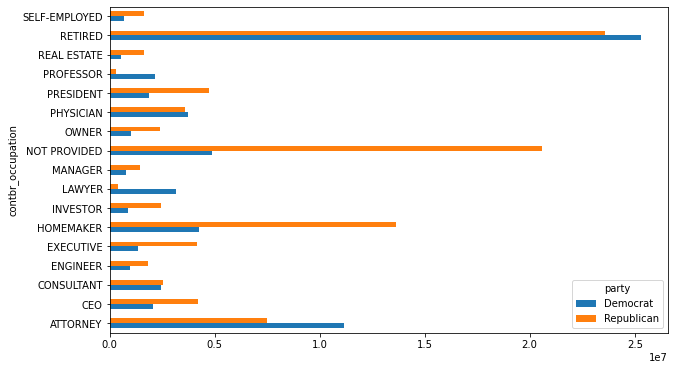

In [342]:
over_2mm.plot(kind='barh');

In [348]:
# You might be interested in the top donor occupations or top companies donating to Obama and Romney
def get_top_amounts(group, key, n=5):
    totals = group.groupby(key)['contb_receipt_amt'].sum()
    # Order totals by key in descending order 
    return totals.sort_values(ascending=False)[-n:]

In [349]:
grouped = fec_mrbo.groupby('cand_nm')
grouped.apply(get_top_amounts, 'contbr_occupation', n=7)

cand_nm        contbr_occupation                     
Obama, Barack  COMPUTER ASSISTANT                        3.0
               SPRINKLER FITTER FIRE PROTECTION SPECI    3.0
               ADMINISTRATION/INSTRUCTOR                 3.0
               LEAD UI/UX DEVELOPER                      3.0
               POLICY/ LAWYER                            3.0
               LAN/WAN ANALYST                           3.0
               SR MGR                                    3.0
Romney, Mitt   MD - UROLOGIST                            5.0
               DISTRICT REPRESENTATIVE                   5.0
               INDEPENDENT PROFESSIONAL                  3.0
               REMODELER & SEMI RETIRED                  3.0
               AFFORDABLE REAL ESTATE DEVELOPER          3.0
               IFC CONTRACTING SOLUTIONS                 3.0
               3RD GENERATION FAMILY BUSINESS OWNER      3.0
Name: contb_receipt_amt, dtype: float64

In [350]:
grouped.apply(get_top_amounts, 'contbr_employer', n=10)

cand_nm        contbr_employer                   
Obama, Barack  SOLIYA                                3.0
               CARR ENTERPRISES                      3.0
               PENN STATE DICKINSON SCHOOL OF LAW    3.0
               CADUCEUS OCCUPATIONAL MEDICINE        3.0
               N.A.                                  3.0
               REAL ENERGY CONSULTING SERVICES       3.0
               JPDSYSTEMS, LLC                       3.0
               CASS REGIONAL MED. CENTER             2.5
               ARCON CORP                            2.0
               THE VICTORIA GROUP, INC.              2.0
Romney, Mitt   EASTHAM CAPITAL                       5.0
               GREGORY GALLIVAN                      5.0
               DIRECT LENDERS LLC                    5.0
               LOUGH INVESTMENT ADVISORY LLC         4.0
               WATERWORKS INDUSRTIES                 3.0
               WILL MERRIFIELD                       3.0
               HONOLD COMMUNICTAIONS  

# Bucketing Donation Amounts

In [357]:
fec_mrbo.contb_receipt_amt.head()

411     25.0
412    110.0
413    250.0
414     30.0
415    100.0
Name: contb_receipt_amt, dtype: float64

In [352]:
# A useful way to analyze this data is to use the cut function to discretize the contributor amounts into buckets 
# by contribution size
bins = np.array([0, 1, 10, 100, 1000, 10000, 100000, 1000000, 10000000])
labels = pd.cut(fec_mrbo.contb_receipt_amt, bins)
labels

411         (10, 100]
412       (100, 1000]
413       (100, 1000]
414         (10, 100]
415         (10, 100]
             ...     
701381      (10, 100]
701382    (100, 1000]
701383        (1, 10]
701384      (10, 100]
701385    (100, 1000]
Name: contb_receipt_amt, Length: 694282, dtype: category
Categories (8, interval[int64]): [(0, 1] < (1, 10] < (10, 100] < (100, 1000] < (1000, 10000] < (10000, 100000] < (100000, 1000000] < (1000000, 10000000]]

In [354]:
grouped = fec_mrbo.groupby(['cand_nm', labels])
grouped.size().unstack(0) #size() including 0s

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",493,77
"(1, 10]",40070,3681
"(10, 100]",372280,31853
"(100, 1000]",153991,43357
"(1000, 10000]",22284,26186
"(10000, 100000]",2,1
"(100000, 1000000]",3,0
"(1000000, 10000000]",4,0


In [358]:
bucket_sums = grouped.contb_receipt_amt.sum().unstack(0) #sum()
bucket_sums

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",318.24,77.00
"(1, 10]",337267.62,29819.66
"(10, 100]",20288981.41,1987783.76
"(100, 1000]",54798531.46,22363381.69
"(1000, 10000]",51753705.67,63942145.42
"(10000, 100000]",59100.00,12700.00
"(100000, 1000000]",1490683.08,NaN
"(1000000, 10000000]",7148839.76,NaN


In [360]:
#divide each row by the total contribution amount
normed_sums = bucket_sums.div(bucket_sums.sum(axis=1), axis=0)
normed_sums

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",0.805182,0.194818
"(1, 10]",0.918767,0.081233
"(10, 100]",0.910769,0.089231
"(100, 1000]",0.710176,0.289824
"(1000, 10000]",0.447326,0.552674
"(10000, 100000]",0.823120,0.176880
"(100000, 1000000]",1.000000,NaN
"(1000000, 10000000]",1.000000,NaN


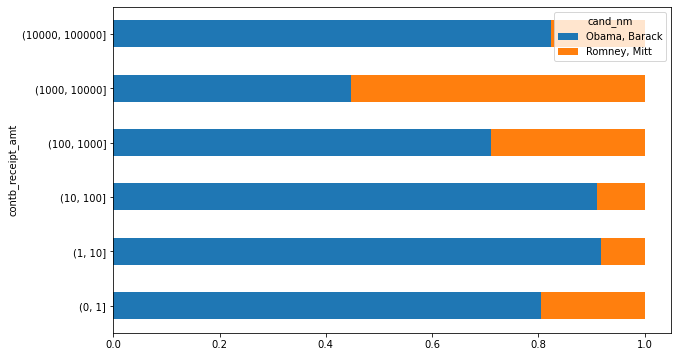

In [362]:
# excluded the two largest bins as these are not donations by individuals
normed_sums[:-2].plot(kind='barh', stacked=True);

# Donation Statistics by State

In [363]:
grouped = fec_mrbo.groupby(['cand_nm', 'contbr_st'])
totals = grouped.contb_receipt_amt.sum().unstack(0).fillna(0)
totals

cand_nm,"Obama, Barack","Romney, Mitt"
contbr_st,,
AA,56405.00,135.00
AB,2048.00,0.00
AE,42973.75,5680.00
AK,281840.15,86204.24
AL,543123.48,527303.51
...,...,...
WI,1130155.46,270316.32
WV,169154.47,126725.12
WY,194046.74,252595.84


In [365]:
totals = totals[totals.sum(1)>100000]
totals[:10]

cand_nm,"Obama, Barack","Romney, Mitt"
contbr_st,,
AK,281840.15,86204.24
AL,543123.48,527303.51
AR,359247.28,105556.00
AZ,1506476.98,1888436.23
CA,23824984.24,11237636.60
CO,2132429.49,1506714.12
CT,2068291.26,3499475.45
DC,4373538.80,1025137.50
DE,336669.14,82712.00


In [366]:
percent = totals.div(totals.sum(1), axis=0)
percent[:10]

cand_nm,"Obama, Barack","Romney, Mitt"
contbr_st,,
AK,0.765778,0.234222
AL,0.507390,0.492610
AR,0.772902,0.227098
AZ,0.443745,0.556255
CA,0.679498,0.320502
CO,0.585970,0.414030
CT,0.371476,0.628524
DC,0.810113,0.189887
DE,0.802776,0.197224


In [367]:
from mpl_toolkits.basemap import Basemap, cm 
import numpy as np
from matplotlib import rcParams
from matplotlib.collections import LineCollection 
import matplotlib.pyplot as plt

from shapelib import ShapeFile 
import dbflib

obama = percent['Obama, Barack']

fig = plt.figure(figsize=(12, 12)) 
ax = fig.add_axes([0.1,0.1,0.8,0.8])

lllat = 21; urlat = 53; lllon = -118; urlon = -62


ModuleNotFoundError: No module named 'mpl_toolkits.basemap'

In [ ]:
m = Basemap(ax=ax, projection='stere',lon_0=(urlon + lllon) / 2, lat_0=(urlat + lllat) / 2, 
            llcrnrlat=lllat, urcrnrlat=urlat, llcrnrlon=lllon, urcrnrlon=urlon, resolution='l')
m.drawcoastlines() 
m.drawcountries()

In [ ]:
shp = ShapeFile('../states/statesp020') 
dbf = dbflib.open('../states/statesp020')

In [ ]:
for npoly in range(shp.info()[0]):
    # Draw colored polygons on the map 
    shpsegs = []
    shp_object = shp.read_object(npoly) 
    verts = shp_object.vertices()
    rings = len(verts)
    
    for ring in range(rings):
        lons, lats = zip(*verts[ring]) 
        x, y = m(lons, lats) 
        shpsegs.append(zip(x,y))
        
        if ring == 0:
            shapedict = dbf.read_record(npoly) 
        name = shapedict['STATE']
        
    lines = LineCollection(shpsegs,antialiaseds=(1,))
    
    # state_to_code dict, e.g. 'ALASKA' -> 'AK', omitted 
    try:
        per = obama[state_to_code[name.upper()]] 
    except KeyError:
        continue
        
    lines.set_facecolors('k')
    lines.set_alpha(0.75 * per) # Shrink the percentage a bit 
    lines.set_edgecolors('k')
    lines.set_linewidth(0.3)
    ax.add_collection(lines)

In [ ]:
plt.show()